In [24]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from API_Keys import (consumer_key, 
                    consumer_key_secret, 
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
counter = 1

bbc = []

oldest_tweet = None

for x in range(5):

    public_tweets = api.user_timeline('@BBC', max_id = oldest_tweet)

    for tweet in public_tweets:

        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        oldest_tweet = tweet['id'] - 1
        
        bbc.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        counter += 1

In [3]:
counter = 1

cbs = []

oldest_tweet = None

for x in range(5):

    public_tweets = api.user_timeline('@CBS', max_id = oldest_tweet)

    for tweet in public_tweets:

        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        oldest_tweet = tweet['id'] - 1
        
        cbs.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        counter += 1

In [4]:
counter = 1

cnn = []

oldest_tweet = None

for x in range(5):

    public_tweets = api.user_timeline('@CNN', max_id = oldest_tweet)

    for tweet in public_tweets:

        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        oldest_tweet = tweet['id'] - 1
        
        cnn.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        counter += 1

In [5]:
counter = 1

fox = []

oldest_tweet = None

for x in range(5):

    public_tweets = api.user_timeline('@FoxNews', max_id = oldest_tweet)

    for tweet in public_tweets:

        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        oldest_tweet = tweet['id'] - 1
        
        fox.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        counter += 1

In [6]:
counter = 1

nyt = []

oldest_tweet = None

for x in range(5):

    public_tweets = api.user_timeline('@nytimes', max_id = oldest_tweet)

    for tweet in public_tweets:

        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        oldest_tweet = tweet['id'] - 1
        
        nyt.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        counter += 1

In [7]:
bbc_pd = pd.DataFrame.from_dict(bbc)
cbs_pd = pd.DataFrame.from_dict(cbs)
cnn_pd = pd.DataFrame.from_dict(cnn)
fox_pd = pd.DataFrame.from_dict(fox)
nyt_pd = pd.DataFrame.from_dict(nyt)

/Users/jcson/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


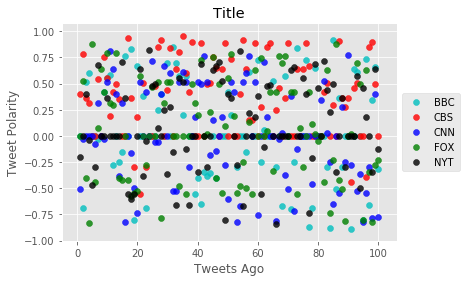

In [21]:
fig=plt.figure()
ax = plt.subplot(111)
ax1=fig.add_subplot(111)

ax1.scatter(bbc_pd['Tweets Ago'],bbc_pd['Compound'], color='c', marker="o", linewidth=0.5,alpha=0.8,label='BBC')
ax1.scatter(cbs_pd['Tweets Ago'],cbs_pd['Compound'], color='r', marker="o", linewidth=0.5,alpha=0.8,label='CBS')
ax1.scatter(cnn_pd['Tweets Ago'],cnn_pd['Compound'], color='b', marker="o", linewidth=0.5,alpha=0.8,label='CNN')
ax1.scatter(fox_pd['Tweets Ago'],fox_pd['Compound'], color='g', marker="o", linewidth=0.5,alpha=0.8,label='FOX')
ax1.scatter(nyt_pd['Tweets Ago'],nyt_pd['Compound'], color='k', marker="o", linewidth=0.5,alpha=0.8,label='NYT')
                                        
plt.title('Title')
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [23]:
bbc_pd.to_csv('bbc.csv')
cbs_pd.to_csv('cbs.csv')
cnn_pd.to_csv('cnn.csv')
fox_pd.to_csv('fox.csv')
nyt_pd.to_csv('nyt.csv')